# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.


In [1]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [2]:
# Cell type : CodeWrite

def normal_pdf(x, mu, cov):
    coeff = 1 / (((2* np.pi)**(len(mu)/2)) * (np.linalg.det(cov)**(1/2)))
    exp_coeff = (-1/2) * ((x-mu).T.dot(np.linalg.inv(cov))).dot((x-mu))
    return float(coeff * np.exp(exp_coeff))

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    X_train_plus = X_train[np.where(Y_train == 1)]
    X_train_minus = X_train[np.where(Y_train == -1)]
    mu_plus = np.mean(X_train_plus, axis = 0)
    mu_minus = np.mean(X_train_minus, axis = 0)
    Y_test_pred = np.zeros(len(X_test))
    for i in range(len(X_test)):
        Y_test_pred[i] = (1 if normal_pdf(X_test[i], mu_plus, np.eye(len(mu_plus))) >= normal_pdf(X_test[i], mu_minus, np.eye(len(mu_minus))) else -1)
    return Y_test_pred

def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    X_train_plus = X_train[np.where(Y_train == 1)]
    X_train_minus = X_train[np.where(Y_train == -1)]
    mu_plus = np.mean(X_train_plus, axis = 0)
    mu_minus = np.mean(X_train_minus, axis = 0)
    cov_plus = np.cov(X_train_plus, rowvar = False, bias = True) # Bias set as true for normalization by N (As given by ML) and not N-1
    cov_minus = np.cov(X_train_minus, rowvar = False, bias = True)
    cov = (cov_plus * len(X_train_plus) + cov_minus * len(X_train_minus))/len(X_train) # Effective covariance will be a weighted average of individual covariances
    Y_test_pred = np.zeros(len(X_test))
    for i in range(len(X_test)):
        Y_test_pred[i] = (1 if normal_pdf(X_test[i], mu_plus, cov) >= normal_pdf(X_test[i], mu_minus, cov) else -1)
    return Y_test_pred

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    X_train_plus = X_train[np.where(Y_train == 1)]
    X_train_minus = X_train[np.where(Y_train == -1)]
    mu_plus = np.mean(X_train_plus, axis = 0)
    mu_minus = np.mean(X_train_minus, axis = 0)
    cov_plus = np.cov(X_train_plus, rowvar = False, bias = True) # Bias set as true for normalization by N (As given by ML) and not N-1
    cov_minus = np.cov(X_train_minus, rowvar = False, bias = True)
    Y_test_pred = np.zeros(len(X_test))
    for i in range(len(X_test)):
        Y_test_pred[i] = (1 if normal_pdf(X_test[i], mu_plus, cov_plus) >= normal_pdf(X_test[i], mu_minus, cov_minus) else -1)
    return Y_test_pred


In [3]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)

# print(Y_pred_test_1b)
# print(np.count_nonzero(Y_pred_test_1b[1000:] == 1))

**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the nine learnt classifiers, and also give the error rate of the three classifiers on the three datasets as 3x3 table, with appropriately named rows and columns.


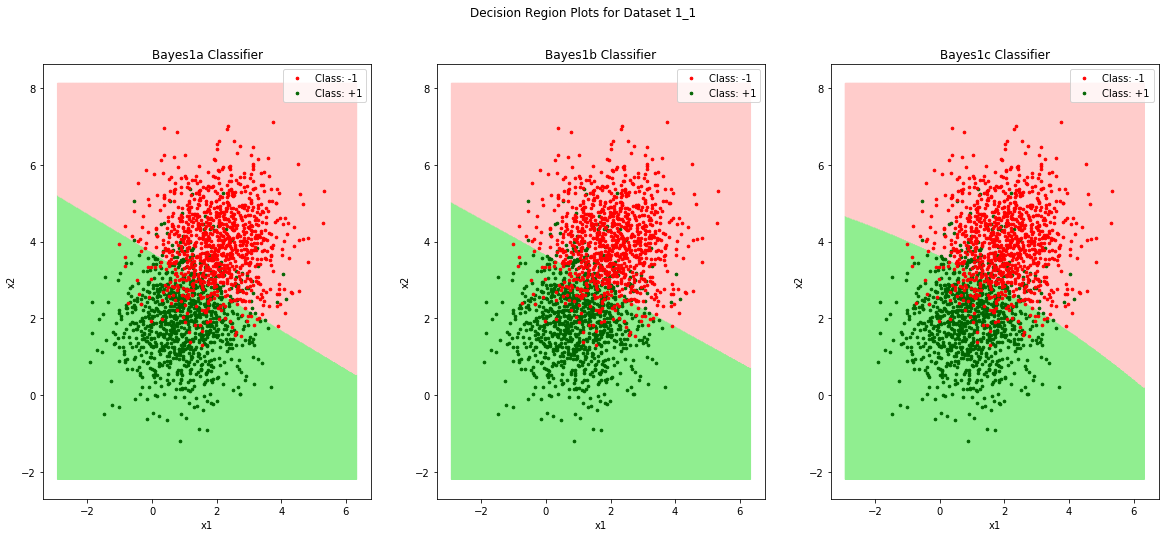

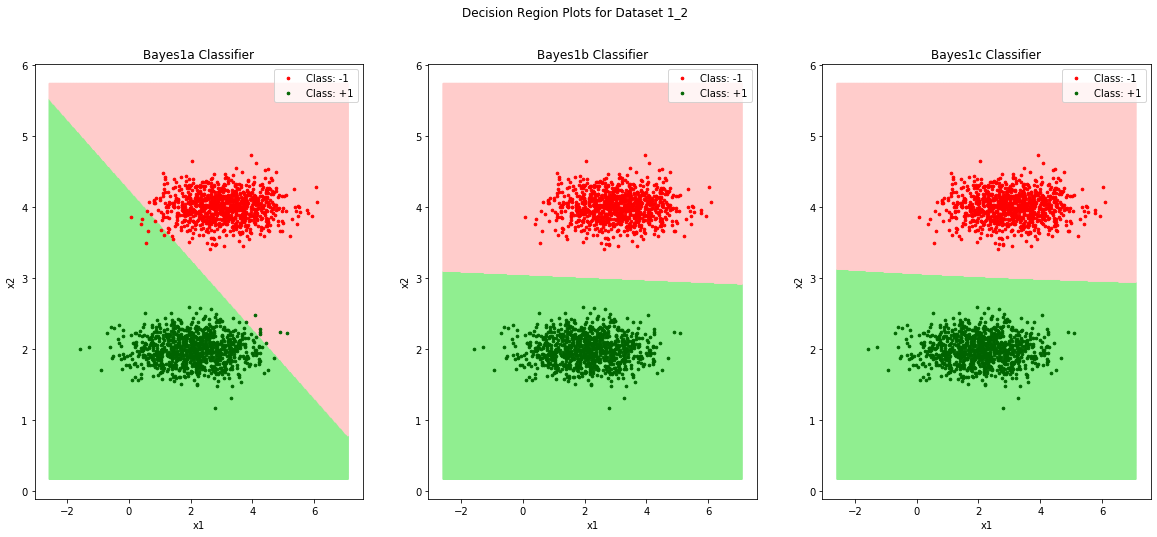

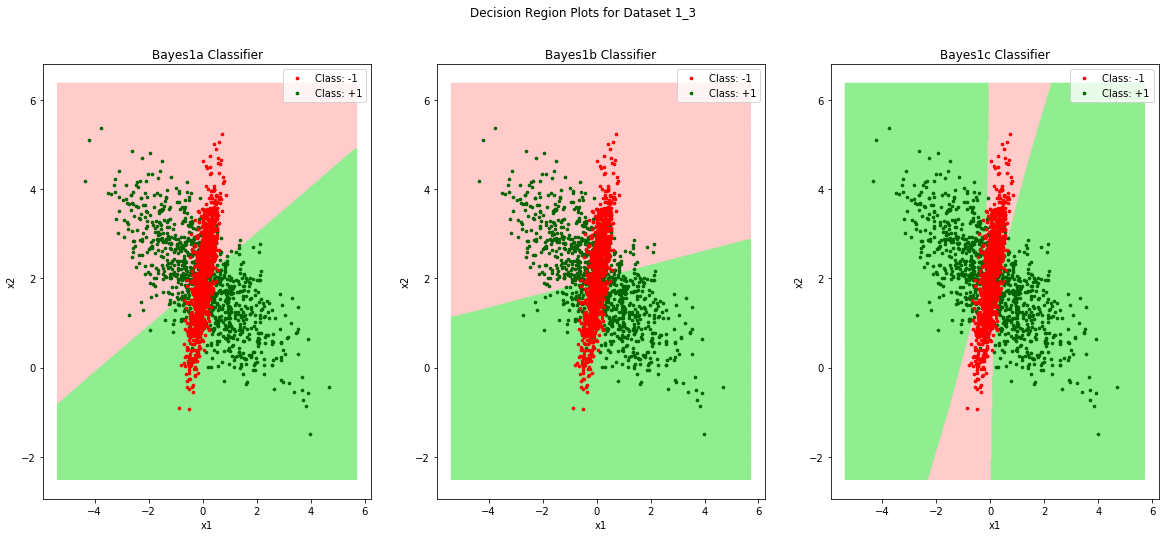

In [4]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

# For Dataset 1_1
dataset1_1 = np.load('dataset1_1.npz')
X_train = dataset1_1['arr_0']
Y_train = dataset1_1['arr_1']
X_test = dataset1_1['arr_2']
Y_test = dataset1_1['arr_3']
Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)

plt.figure(figsize=(20, 8))
plt.suptitle("Decision Region Plots for Dataset 1_1")
plt.subplot(1,3,1)
(x,y) = np.meshgrid(np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 400), np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)
for i in range(len(x)):
        Class[i] = Bayes1a(X_train, Y_train, np.vstack((x[i], y[i])).T)

color = np.array(["#ffcccb", "#111111", "#90EE90"])
colors = color[Class + 1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("Bayes1a Classifier")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y_train)):
    if(Y_train[i] == -1):
        c0 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF0000')
    elif(Y_train[i] == 1):
        c1 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#006400')
        
plt.legend([c0,c1],['Class: -1','Class: +1'])


plt.subplot(1,3,2)
(x,y) = np.meshgrid(np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 400), np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)
for i in range(len(x)):
        Class[i] = Bayes1b(X_train, Y_train, np.vstack((x[i], y[i])).T)

color = np.array(["#ffcccb", "#111111", "#90EE90"])
colors = color[Class + 1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("Bayes1b Classifier")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y_train)):
    if(Y_train[i] == -1):
        c0 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF0000')
    elif(Y_train[i] == 1):
        c1 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#006400')
        
plt.legend([c0,c1],['Class: -1','Class: +1'])


plt.subplot(1,3,3)
(x,y) = np.meshgrid(np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 400), np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)
for i in range(len(x)):
        Class[i] = Bayes1c(X_train, Y_train, np.vstack((x[i], y[i])).T)

color = np.array(["#ffcccb", "#111111", "#90EE90"])
colors = color[Class + 1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("Bayes1c Classifier")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y_train)):
    if(Y_train[i] == -1):
        c0 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF0000')
    elif(Y_train[i] == 1):
        c1 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#006400')
        
plt.legend([c0,c1],['Class: -1','Class: +1'])
plt.show()

# print(np.count_nonzero(Y_pred_test_1a == Y_test)/len(Y_test))
# print(np.count_nonzero(Y_pred_test_1b == Y_test)/len(Y_test))
# print(np.count_nonzero(Y_pred_test_1c == Y_test)/len(Y_test))



# For Dataset 1_2
dataset1_2 = np.load('dataset1_2.npz')
X_train = dataset1_2['arr_0']
Y_train = dataset1_2['arr_1']
X_test = dataset1_2['arr_2']
Y_test = dataset1_2['arr_3']
Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)

plt.figure(figsize=(20, 8))
plt.suptitle("Decision Region Plots for Dataset 1_2")
plt.subplot(1,3,1)
(x,y) = np.meshgrid(np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 400), np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)
for i in range(len(x)):
        Class[i] = Bayes1a(X_train, Y_train, np.vstack((x[i], y[i])).T)

color = np.array(["#ffcccb", "#111111", "#90EE90"])
colors = color[Class + 1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("Bayes1a Classifier")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y_train)):
    if(Y_train[i] == -1):
        c0 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF0000')
    elif(Y_train[i] == 1):
        c1 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#006400')
        
plt.legend([c0,c1],['Class: -1','Class: +1'])


plt.subplot(1,3,2)
(x,y) = np.meshgrid(np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 400), np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)
for i in range(len(x)):
        Class[i] = Bayes1b(X_train, Y_train, np.vstack((x[i], y[i])).T)

color = np.array(["#ffcccb", "#111111", "#90EE90"])
colors = color[Class + 1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("Bayes1b Classifier")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y_train)):
    if(Y_train[i] == -1):
        c0 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF0000')
    elif(Y_train[i] == 1):
        c1 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#006400')
        
plt.legend([c0,c1],['Class: -1','Class: +1'])


plt.subplot(1,3,3)
(x,y) = np.meshgrid(np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 400), np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)
for i in range(len(x)):
        Class[i] = Bayes1c(X_train, Y_train, np.vstack((x[i], y[i])).T)

color = np.array(["#ffcccb", "#111111", "#90EE90"])
colors = color[Class + 1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("Bayes1c Classifier")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y_train)):
    if(Y_train[i] == -1):
        c0 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF0000')
    elif(Y_train[i] == 1):
        c1 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#006400')
        
plt.legend([c0,c1],['Class: -1','Class: +1'])
plt.show()

# print(np.count_nonzero(Y_pred_test_1a == Y_test)/len(Y_test))
# print(np.count_nonzero(Y_pred_test_1b == Y_test)/len(Y_test))
# print(np.count_nonzero(Y_pred_test_1c == Y_test)/len(Y_test))



# For Dataset 1_3
dataset1_3 = np.load('dataset1_3.npz')
X_train = dataset1_3['arr_0']
Y_train = dataset1_3['arr_1']
X_test = dataset1_3['arr_2']
Y_test = dataset1_3['arr_3']
Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)

plt.figure(figsize=(20, 8))
plt.suptitle("Decision Region Plots for Dataset 1_3")
plt.subplot(1,3,1)
(x,y) = np.meshgrid(np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 400), np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)
for i in range(len(x)):
        Class[i] = Bayes1a(X_train, Y_train, np.vstack((x[i], y[i])).T)

color = np.array(["#ffcccb", "#111111", "#90EE90"])
colors = color[Class + 1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("Bayes1a Classifier")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y_train)):
    if(Y_train[i] == -1):
        c0 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF0000')
    elif(Y_train[i] == 1):
        c1 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#006400')
        
plt.legend([c0,c1],['Class: -1','Class: +1'])


plt.subplot(1,3,2)
(x,y) = np.meshgrid(np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 400), np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)
for i in range(len(x)):
        Class[i] = Bayes1b(X_train, Y_train, np.vstack((x[i], y[i])).T)

color = np.array(["#ffcccb", "#111111", "#90EE90"])
colors = color[Class + 1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("Bayes1b Classifier")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y_train)):
    if(Y_train[i] == -1):
        c0 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF0000')
    elif(Y_train[i] == 1):
        c1 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#006400')
        
plt.legend([c0,c1],['Class: -1','Class: +1'])


plt.subplot(1,3,3)
(x,y) = np.meshgrid(np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 400), np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)
for i in range(len(x)):
        Class[i] = Bayes1c(X_train, Y_train, np.vstack((x[i], y[i])).T)

color = np.array(["#ffcccb", "#111111", "#90EE90"])
colors = color[Class + 1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("Bayes1c Classifier")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y_train)):
    if(Y_train[i] == -1):
        c0 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF0000')
    elif(Y_train[i] == 1):
        c1 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#006400')
        
plt.legend([c0,c1],['Class: -1','Class: +1'])
plt.show()

# print(np.count_nonzero(Y_pred_test_1a == Y_test)/len(Y_test))
# print(np.count_nonzero(Y_pred_test_1b == Y_test)/len(Y_test))
# print(np.count_nonzero(Y_pred_test_1c == Y_test)/len(Y_test))

## <center>Error Rates on Test Data</center> 

|                    | Bayes1a | Bayes1b | Bayes1c |  
|--------------------|---------|---------|---------|
| <b>Dataset 1_1 </b>|  12.6%  | 12.45%  | 12.45%  |
| <b>Dataset 1_2 </b>|  0.85%  |    0%   |    0%   |
| <b>Dataset 1_3 </b>|  49.7%  |  49.5%  |  13.5%  |

## <center>Observations</center>
As expected, the Bayes1c Classifier done on the assumption that both the classes come from a normal distribution with different covariance matrices performs the best on all the 3 test datasets. As this gives the most adaptive distribution for each class, the observation is justified. Among the other 2 classifiers, Bayes1b performs marginally better than Bayes1a as it atleast adapts to the overall distribution of the data, even though it assumes the same covariance matrix for both classes. Bayes1a doesn't perform as good as the other two as it is built on the assumption that both the classes are generated from the identity covariance matrix, which may not be the case. It may also be inferred that Bayes1a classifier can give only a linear decision boundary.

Comparing relative accuracies between the 3 datasets, our Bayes classifier performs the best on Dataset 1_2 as the means are well-separated with very less overlap between datapoints. However, our Bayes classifier on Dataset 1_3 doesn't perform as good as the other two as the means are very close to each other with a considerable overlap between datapoints from both classes. Performance on Dataset 1_1 is inbetween the other 2 as the means are moderately separated with minimal overlap of datapoints between the two classes.


** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [5]:
# Cell type : CodeWrite
# Fill in functions in this cell

L = np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])

def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    X_train_1 = X_train[np.where(Y_train == 1)]
    X_train_2 = X_train[np.where(Y_train == 2)]
    X_train_3 = X_train[np.where(Y_train == 3)]
    X_train_4 = X_train[np.where(Y_train == 4)]
    mu_1 = np.mean(X_train_1, axis = 0)
    mu_2 = np.mean(X_train_2, axis = 0)
    mu_3 = np.mean(X_train_3, axis = 0)
    mu_4 = np.mean(X_train_4, axis = 0)
    Y_test_pred = np.zeros(len(X_test))
    for i in range(len(X_test)):
        R = np.zeros(len(L))
        for j in range(len(L)):
            R[j] = (L[j][0] * normal_pdf(X_test[i], mu_1, np.eye(len(mu_1))) + 
                    L[j][1] * normal_pdf(X_test[i], mu_2, np.eye(len(mu_2))) + 
                    L[j][2] * normal_pdf(X_test[i], mu_3, np.eye(len(mu_3))) +
                    L[j][3] * normal_pdf(X_test[i], mu_4, np.eye(len(mu_4))))
            Y_test_pred[i] = np.argmin(R) + 1
    return Y_test_pred
    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    X_train_1 = X_train[np.where(Y_train == 1)]
    X_train_2 = X_train[np.where(Y_train == 2)]
    X_train_3 = X_train[np.where(Y_train == 3)]
    X_train_4 = X_train[np.where(Y_train == 4)]
    mu_1 = np.mean(X_train_1, axis = 0)
    mu_2 = np.mean(X_train_2, axis = 0)
    mu_3 = np.mean(X_train_3, axis = 0)
    mu_4 = np.mean(X_train_4, axis = 0)
    cov_1 = np.cov(X_train_1, rowvar = False, bias = True)
    cov_2 = np.cov(X_train_2, rowvar = False, bias = True)
    cov_3 = np.cov(X_train_3, rowvar = False, bias = True)
    cov_4 = np.cov(X_train_4, rowvar = False, bias = True)
    cov = (cov_1 * len(X_train_1) + cov_2 * len(X_train_2) + cov_3 * len(X_train_3) + cov_4 * len(X_train_4))/len(X_train)
    
    Y_test_pred = np.zeros(len(X_test))
    for i in range(len(X_test)):
        R = np.zeros(len(L))
        for j in range(len(L)):
            R[j] = (L[j][0] * normal_pdf(X_test[i], mu_1, cov) + L[j][1] * normal_pdf(X_test[i], mu_2, cov) + 
                    L[j][2] * normal_pdf(X_test[i], mu_3, cov) + L[j][3] * normal_pdf(X_test[i], mu_4, cov))
            Y_test_pred[i] = np.argmin(R) + 1
    return Y_test_pred

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    X_train_1 = X_train[np.where(Y_train == 1)]
    X_train_2 = X_train[np.where(Y_train == 2)]
    X_train_3 = X_train[np.where(Y_train == 3)]
    X_train_4 = X_train[np.where(Y_train == 4)]
    mu_1 = np.mean(X_train_1, axis = 0)
    mu_2 = np.mean(X_train_2, axis = 0)
    mu_3 = np.mean(X_train_3, axis = 0)
    mu_4 = np.mean(X_train_4, axis = 0)
    cov_1 = np.cov(X_train_1, rowvar = False, bias = True)
    cov_2 = np.cov(X_train_2, rowvar = False, bias = True)
    cov_3 = np.cov(X_train_3, rowvar = False, bias = True)
    cov_4 = np.cov(X_train_4, rowvar = False, bias = True)

    Y_test_pred = np.zeros(len(X_test))
    for i in range(len(X_test)):
        R = np.zeros(len(L))
        for j in range(len(L)):
            R[j] = (L[j][0] * normal_pdf(X_test[i], mu_1, cov_1) + L[j][1] * normal_pdf(X_test[i], mu_2, cov_2) + 
                    L[j][2] * normal_pdf(X_test[i], mu_3, cov_3) + L[j][3] * normal_pdf(X_test[i], mu_4, cov_4))
            Y_test_pred[i] = np.argmin(R) + 1
    return Y_test_pred


In [6]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)

# print(np.count_nonzero(Y_pred_test_2a == Y_test)/len(Y_test))
# print(np.count_nonzero(Y_pred_test_2b == Y_test)/len(Y_test))
# print(np.count_nonzero(Y_pred_test_2c == Y_test)/len(Y_test))


**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


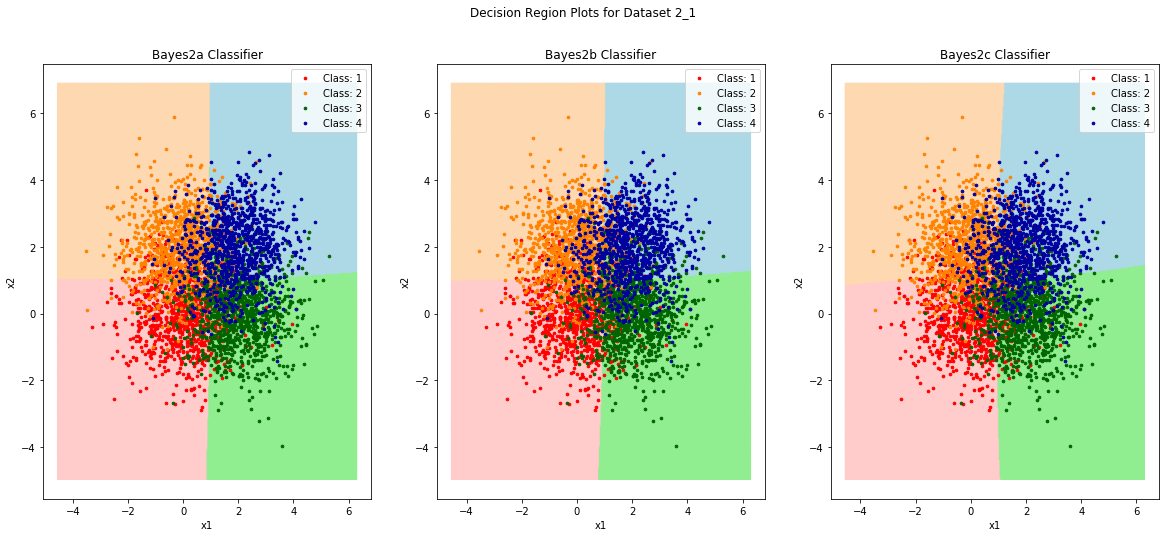

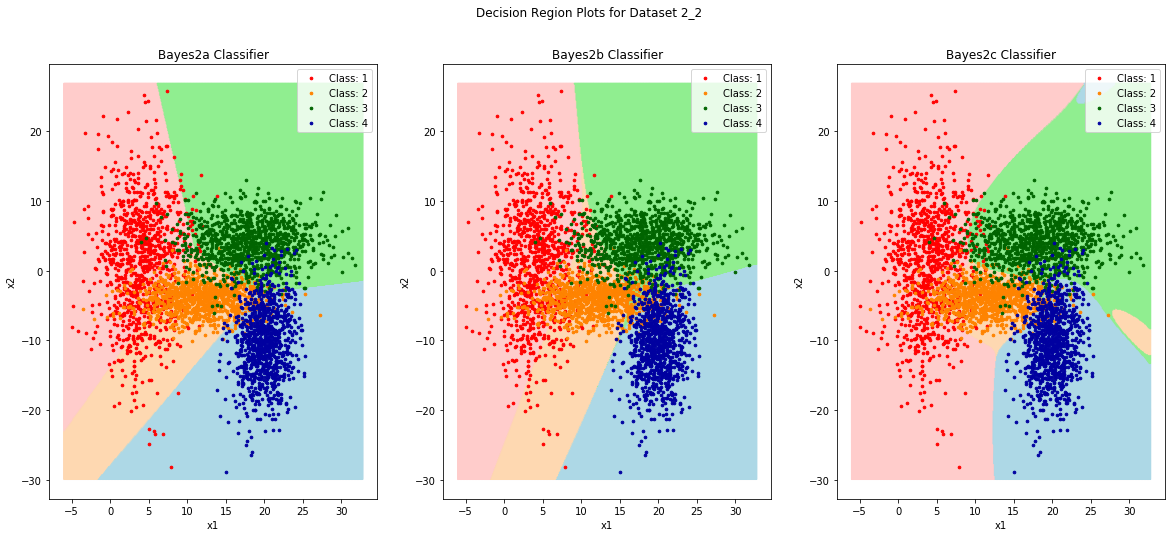

In [7]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

# For Dataset 2_1
dataset2_1 = np.load('dataset2_1.npz')
X_train = dataset2_1['arr_0']
Y_train = dataset2_1['arr_1']
X_test = dataset2_1['arr_2']
Y_test = dataset2_1['arr_3']
Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)


# print(np.sum(np.abs(Y_pred_test_2a - Y_test))/len(Y_test))
# print(np.sum(np.abs(Y_pred_test_2b - Y_test))/len(Y_test))
# print(np.sum(np.abs(Y_pred_test_2c - Y_test))/len(Y_test))

# confusion_matrix_2a = np.zeros([4,4])
# for i in range(len(Y_test)):
#     confusion_matrix_2a[int(Y_test[i])-1][int(Y_pred_test_2a[i])-1] += 1
# print(confusion_matrix_2a)

# confusion_matrix_2b = np.zeros([4,4])
# for i in range(len(Y_test)):
#     confusion_matrix_2b[int(Y_test[i])-1][int(Y_pred_test_2b[i])-1] += 1
# print(confusion_matrix_2b)

# confusion_matrix_2c = np.zeros([4,4])
# for i in range(len(Y_test)):
#     confusion_matrix_2c[int(Y_test[i])-1][int(Y_pred_test_2c[i])-1] += 1
# print(confusion_matrix_2c)

plt.figure(figsize=(20, 8))
plt.suptitle("Decision Region Plots for Dataset 2_1")
plt.subplot(1,3,1)
(x,y) = np.meshgrid(np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 400), np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)
for i in range(len(x)):
        Class[i] = Bayes2a(X_train, Y_train, np.vstack((x[i], y[i])).T)

color = np.array(["#ffcccb", "#fed8b1", "#90EE90", "#ADD8E6"])
colors = color[Class-1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("Bayes2a Classifier")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y_train)):
    if(Y_train[i] == 1):
        c0 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF0000')
    elif(Y_train[i] == 2):
        c1 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF8300')
    elif(Y_train[i] == 3):
        c2 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#006400')
    elif(Y_train[i] == 4):
        c3 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#0000A0')
        
plt.legend([c0,c1,c2,c3],['Class: 1','Class: 2','Class: 3','Class: 4'])


plt.subplot(1,3,2)
(x,y) = np.meshgrid(np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 400), np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)
for i in range(len(x)):
        Class[i] = Bayes2b(X_train, Y_train, np.vstack((x[i], y[i])).T)

color = np.array(["#ffcccb", "#fed8b1", "#90EE90", "#ADD8E6"])
colors = color[Class-1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("Bayes2b Classifier")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y_train)):
    if(Y_train[i] == 1):
        c0 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF0000')
    elif(Y_train[i] == 2):
        c1 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF8300')
    elif(Y_train[i] == 3):
        c2 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#006400')
    elif(Y_train[i] == 4):
        c3 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#0000A0')
        
plt.legend([c0,c1,c2,c3],['Class: 1','Class: 2','Class: 3','Class: 4'])


plt.subplot(1,3,3)
(x,y) = np.meshgrid(np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 400), np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)
for i in range(len(x)):
        Class[i] = Bayes2c(X_train, Y_train, np.vstack((x[i], y[i])).T)

color = np.array(["#ffcccb", "#fed8b1", "#90EE90", "#ADD8E6"])
colors = color[Class-1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("Bayes2c Classifier")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y_train)):
    if(Y_train[i] == 1):
        c0 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF0000')
    elif(Y_train[i] == 2):
        c1 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF8300')
    elif(Y_train[i] == 3):
        c2 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#006400')
    elif(Y_train[i] == 4):
        c3 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#0000A0')
        
plt.legend([c0,c1,c2,c3],['Class: 1','Class: 2','Class: 3','Class: 4'])
plt.show()

# For Dataset 2_2
dataset2_2 = np.load('dataset2_2.npz')
X_train = dataset2_2['arr_0']
Y_train = dataset2_2['arr_1']
X_test = dataset2_2['arr_2']
Y_test = dataset2_2['arr_3']
Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)


# print(np.sum(np.abs(Y_pred_test_2a - Y_test))/len(Y_test))
# print(np.sum(np.abs(Y_pred_test_2b - Y_test))/len(Y_test))
# print(np.sum(np.abs(Y_pred_test_2c - Y_test))/len(Y_test))

# confusion_matrix_2a = np.zeros([4,4])
# for i in range(len(Y_test)):
#     confusion_matrix_2a[int(Y_test[i])-1][int(Y_pred_test_2a[i])-1] += 1
# print(confusion_matrix_2a)

# confusion_matrix_2b = np.zeros([4,4])
# for i in range(len(Y_test)):
#     confusion_matrix_2b[int(Y_test[i])-1][int(Y_pred_test_2b[i])-1] += 1
# print(confusion_matrix_2b)

# confusion_matrix_2c = np.zeros([4,4])
# for i in range(len(Y_test)):
#     confusion_matrix_2c[int(Y_test[i])-1][int(Y_pred_test_2c[i])-1] += 1
# print(confusion_matrix_2c)

plt.figure(figsize=(20, 8))
plt.suptitle("Decision Region Plots for Dataset 2_2")
plt.subplot(1,3,1)
(x,y) = np.meshgrid(np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 400), np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)
for i in range(len(x)):
        Class[i] = Bayes2a(X_train, Y_train, np.vstack((x[i], y[i])).T)

color = np.array(["#ffcccb", "#fed8b1", "#90EE90", "#ADD8E6"])
colors = color[Class-1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("Bayes2a Classifier")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y_train)):
    if(Y_train[i] == 1):
        c0 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF0000')
    elif(Y_train[i] == 2):
        c1 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF8300')
    elif(Y_train[i] == 3):
        c2 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#006400')
    elif(Y_train[i] == 4):
        c3 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#0000A0')
        
plt.legend([c0,c1,c2,c3],['Class: 1','Class: 2','Class: 3','Class: 4'])


plt.subplot(1,3,2)
(x,y) = np.meshgrid(np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 400), np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)
for i in range(len(x)):
        Class[i] = Bayes2b(X_train, Y_train, np.vstack((x[i], y[i])).T)

color = np.array(["#ffcccb", "#fed8b1", "#90EE90", "#ADD8E6"])
colors = color[Class-1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("Bayes2b Classifier")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y_train)):
    if(Y_train[i] == 1):
        c0 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF0000')
    elif(Y_train[i] == 2):
        c1 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF8300')
    elif(Y_train[i] == 3):
        c2 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#006400')
    elif(Y_train[i] == 4):
        c3 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#0000A0')
        
plt.legend([c0,c1,c2,c3],['Class: 1','Class: 2','Class: 3','Class: 4'])


plt.subplot(1,3,3)
(x,y) = np.meshgrid(np.linspace(min(X_train[:,0])-1, max(X_train[:,0])+1, 400), np.linspace(min(X_train[:,1])-1, max(X_train[:,1])+1, 400))
Class = np.zeros([len(x),len(y)], dtype=int)
for i in range(len(x)):
        Class[i] = Bayes2c(X_train, Y_train, np.vstack((x[i], y[i])).T)

color = np.array(["#ffcccb", "#fed8b1", "#90EE90", "#ADD8E6"])
colors = color[Class-1]

plt.scatter(x, y, s=1, c=colors.flatten())
plt.title("Bayes2c Classifier")
plt.ylabel("x2")
plt.xlabel("x1")

for i in range(len(Y_train)):
    if(Y_train[i] == 1):
        c0 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF0000')
    elif(Y_train[i] == 2):
        c1 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#FF8300')
    elif(Y_train[i] == 3):
        c2 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#006400')
    elif(Y_train[i] == 4):
        c3 = plt.scatter(X_train[i,0], X_train[i,1], s=7, c='#0000A0')
        
plt.legend([c0,c1,c2,c3],['Class: 1','Class: 2','Class: 3','Class: 4'])
plt.show()

## <center>Expected Loss on Test Data</center> 

|                    | Bayes1a | Bayes2a | Bayes3a |  
|--------------------|---------|---------|---------|
| <b>Dataset 2_1 </b>| 0.42975 | 0.429   | 0.42775 |
| <b>Dataset 2_2 </b>|  0.1835 | 0.1895  | 0.14075 |

## <center>Confusion Matrices on Test Data 2_1</center> 
<table>
    <tr><th> <center> Using Bayes2a </center> </th><th> <center> Using Bayes2b</center>  </th><th> <center> Using Bayes2c</center>  </th></tr>
<tr><td>

|&darr;Targ / Pred&rarr;| 1 | 2 | 3 | 4|
|--------------------|---------|---------|---------|--------|
| <b> 1 </b>| <b>63.3%</b> | 21.9%   | 13.6% | 1.2% |
| <b> 2 </b>| 9.7% | <b>73.8%</b>  | 6.2% | 10.3% |
| <b> 3 </b>| 8.6% | 4.9% | <b>77.0%</b> | 9.5% |
| <b> 4 </b>| 1.5% | 13.6%  | 19.4% | <b>65.5%</b> |

</td><td>

|&darr;Targ / Pred&rarr;| 1 | 2 | 3 | 4|
|--------------------|---------|---------|---------|--------|
| <b> 1 </b>| <b>63.3%</b> | 21.8%   | 13.7% | 1.2% |
| <b> 2 </b>| 9.5% | <b>74.3%</b>  | 6.0% | 10.2% |
| <b> 3 </b>| 8.4% | 4.9% | <b>77.3%</b> | 9.4% |
| <b> 4 </b>| 1.6% | 13.7%  | 19.6% | <b>65.1%</b> |

</td><td>

|&darr;Targ / Pred&rarr;| 1 | 2 | 3 | 4|
|--------------------|---------|---------|---------|--------|
| <b> 1 </b>| <b>63.4%</b> | 21.7%   | 13.8% | 1.1% |
| <b> 2 </b>| 9.9% | <b>74.2%</b>  | 6.1% | 9.8% |
| <b> 3 </b>| 8.7% | 4.7% | <b>77.2%</b> | 9.4% |
| <b> 4 </b>| 1.5% | 13.4%  | 20.1% | <b>65.0%</b> |

</td></tr> </table>

## <center>Confusion Matrices on Test Data 2_2</center> 
<table>
    <tr><th> <center> Using Bayes2a </center> </th><th> <center> Using Bayes2b</center>  </th><th> <center> Using Bayes2c</center>  </th></tr>
<tr><td>

|&darr;Targ / Pred&rarr;| 1 | 2 | 3 | 4|
|--------------------|---------|---------|---------|--------|
| <b> 1 </b>| <b>83.0%</b> | 15.0%   | 1.8% | 0.2% |
| <b> 2 </b>| 9.3% | <b>78.4%</b>  | 4.6% | 7.7% |
| <b> 3 </b>| 3.0% | 6.1% | <b>90.5%</b> | 0.4% |
| <b> 4 </b>| 0.0% | 2.3%  | 7.8% | <b>89.9%</b> |

</td><td> 

|&darr;Targ / Pred&rarr;| 1 | 2 | 3 | 4|
|--------------------|---------|---------|---------|--------|
| <b> 1 </b>| <b>89.1%</b> | 10.6%   | 0.3% | 0.0% |
| <b> 2 </b>| 11.9% | <b>69.1%</b>  | 12.4% | 6.6% |
| <b> 3 </b>| 2.3% | 10.6% | <b>86.4%</b> | 0.7% |
| <b> 4 </b>| 0.0% | 0.5%  | 10.2% | <b>89.3%</b> |

</td><td> 

|&darr;Targ / Pred&rarr;| 1 | 2 | 3 | 4|
|--------------------|---------|---------|---------|--------|
| <b> 1 </b>| <b>90.1%</b> | 8.0%   | 1.9% | 0.0% |
| <b> 2 </b>| 6.4% | <b>82.4%</b>  | 4.6% | 6.6% |
| <b> 3 </b>| 1.9% | 3.1% | <b>93.6%</b> | 1.4% |
| <b> 4 </b>| 0.0% | 3.6%  | 4.8% | <b>91.6%</b> |

</td></tr> </table>

## <center>Observations</center> 

Observations from Question - 1 can be inferred for performance between classifiers. Comparing the datasets, the expected loss on Dataset 2_1 is more than the expected loss on Dataset 2_2 as the misclassifications are higher between farther away classes in Dataset 2_1 (as seen from the confusion matrices), thus increasing the loss contribution from such misclassifications. Also, the accuracy of Dataset 2_2 is higher than Dataset 2_1 for all the classifiers, also contributing to a lesser expected loss for Dataset 2_2.

**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




C:\Users\Siva\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


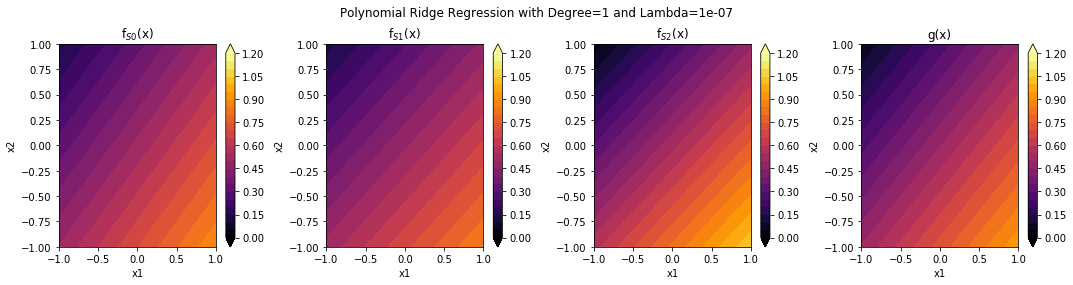

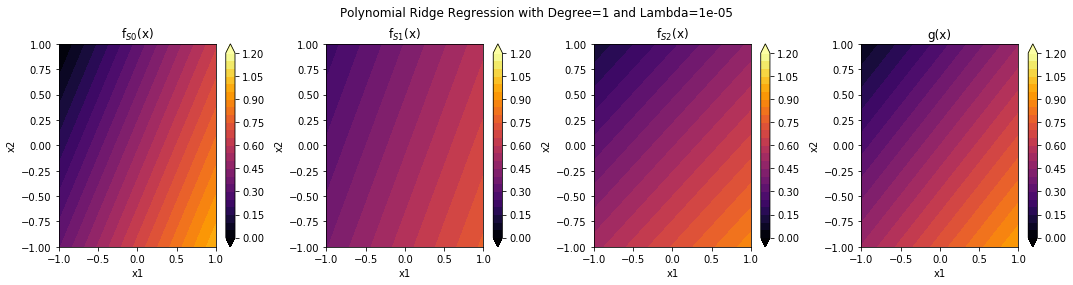

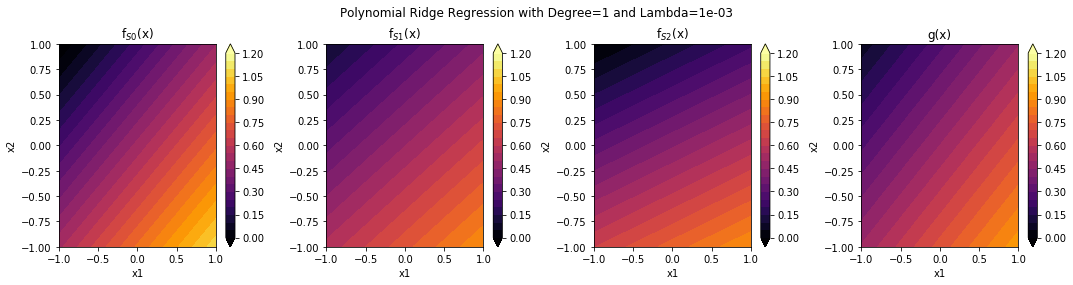

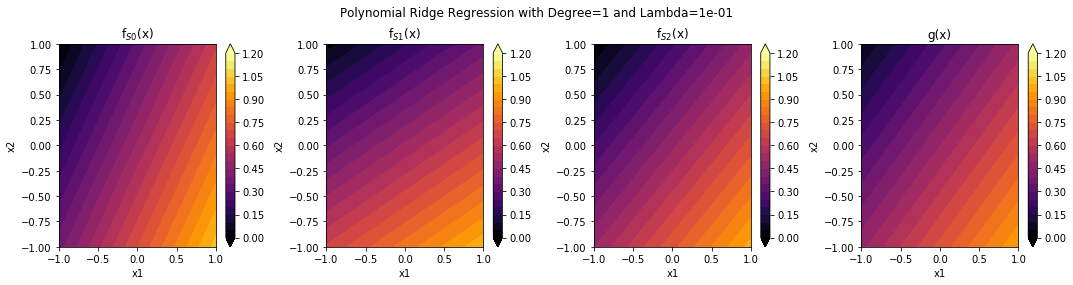

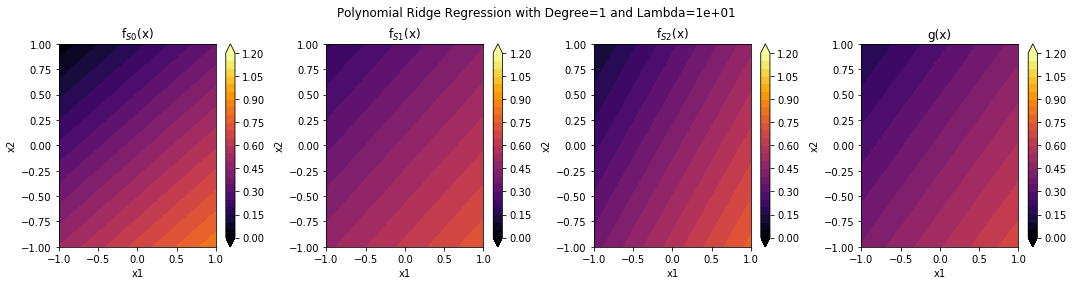

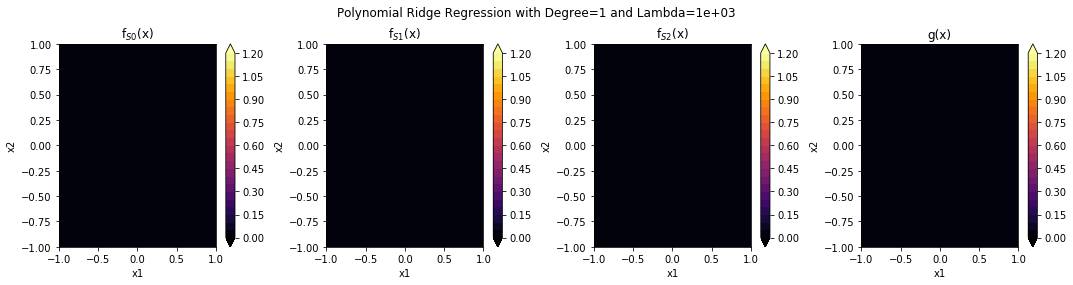

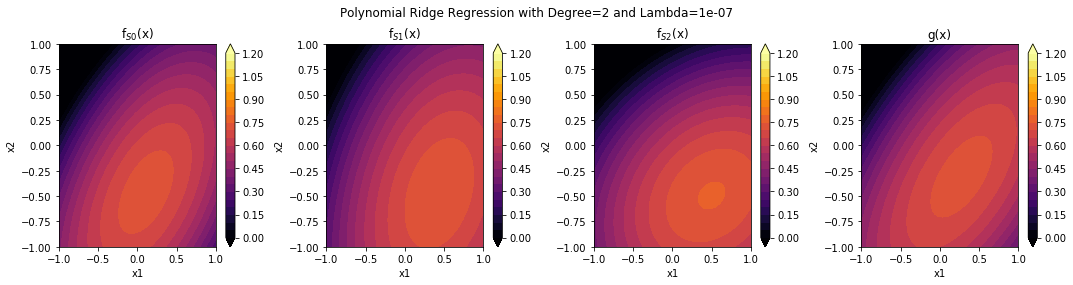

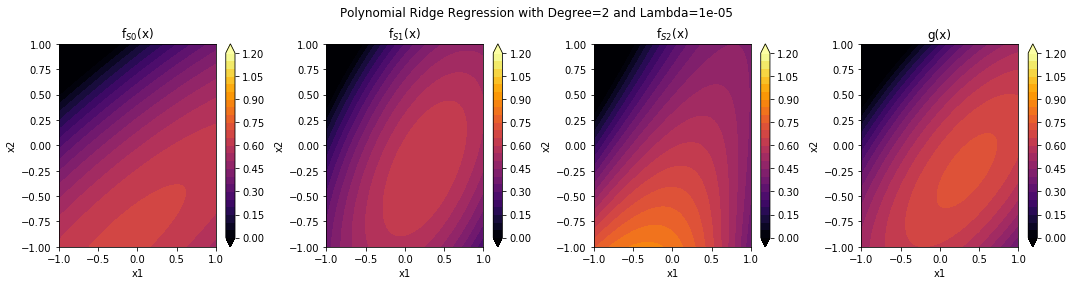

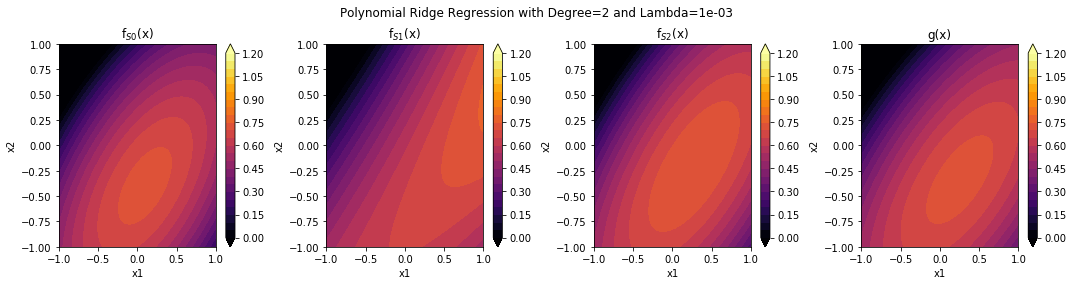

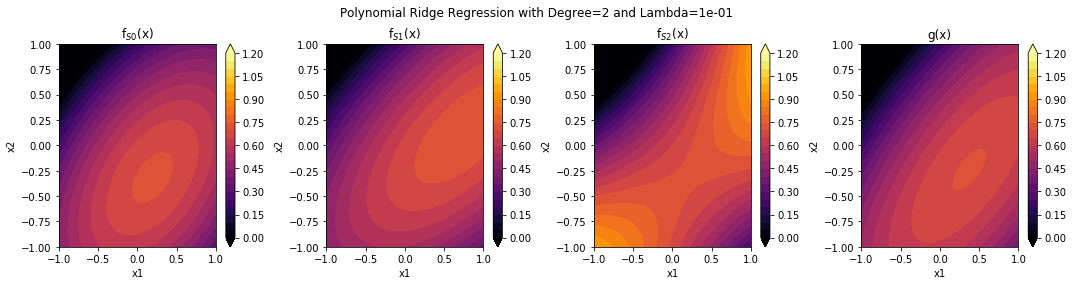

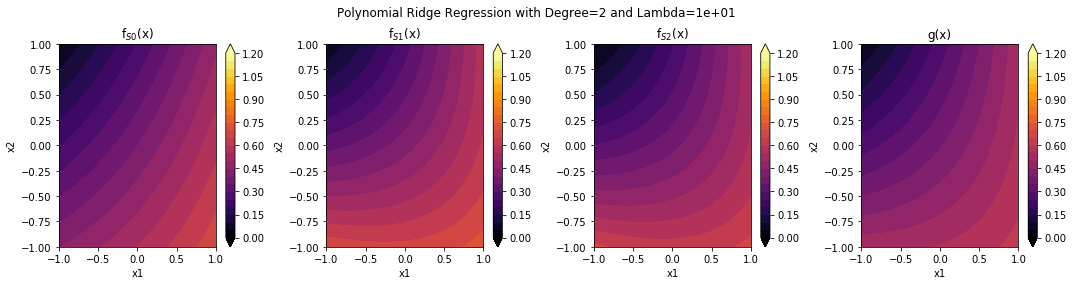

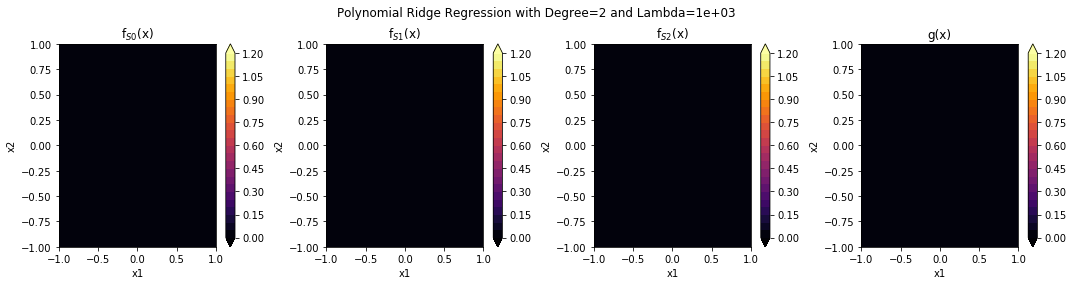

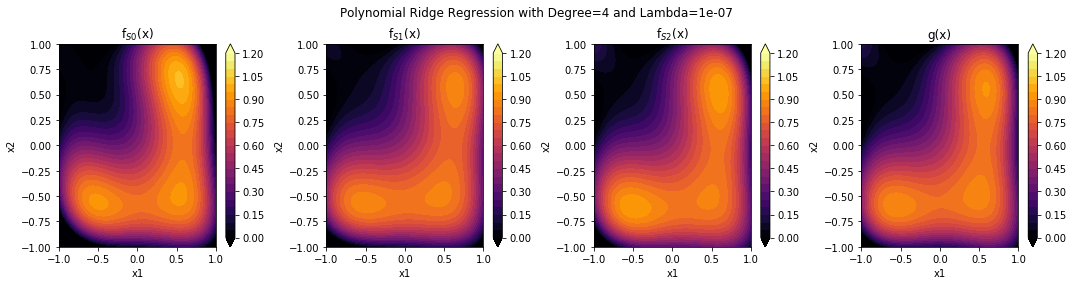

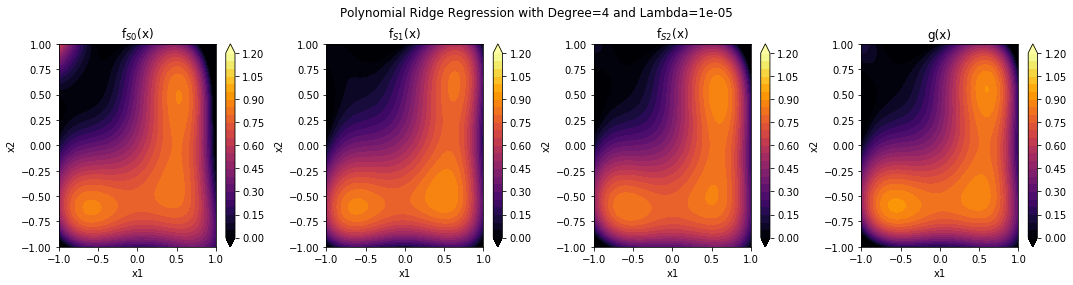

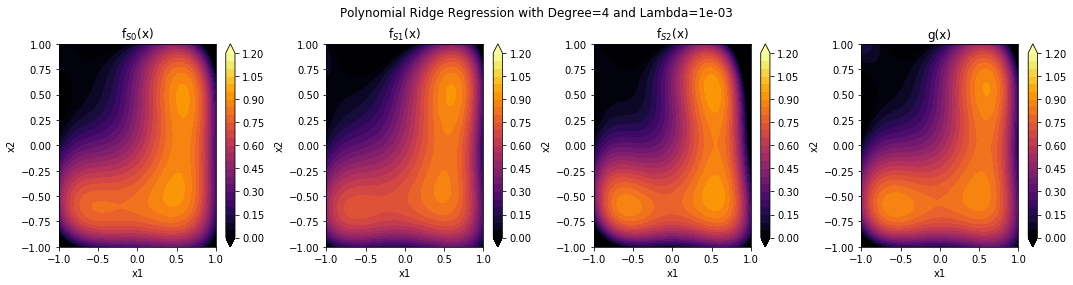

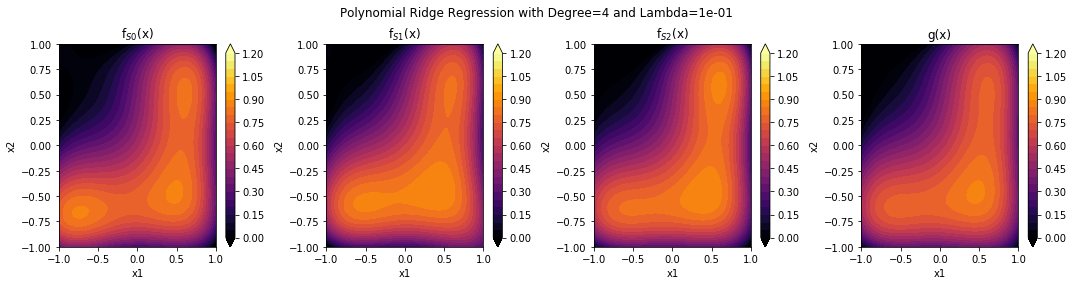

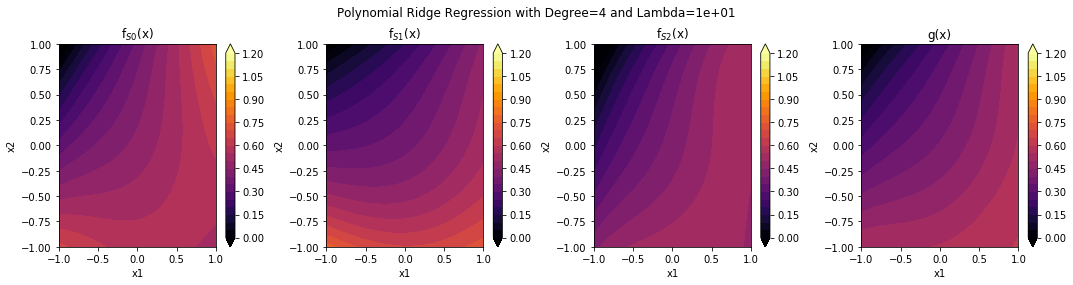

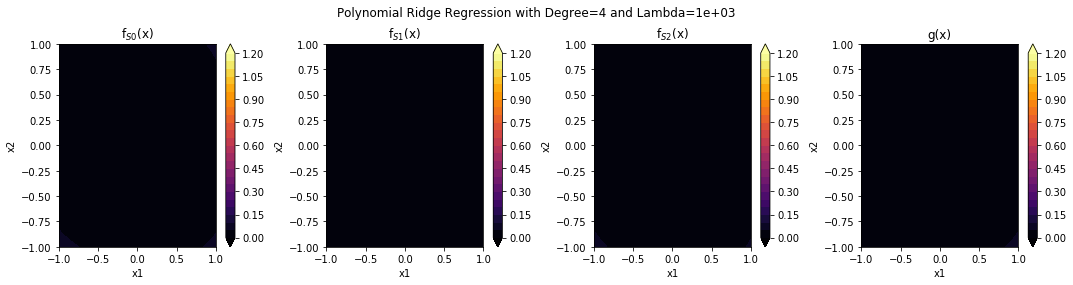

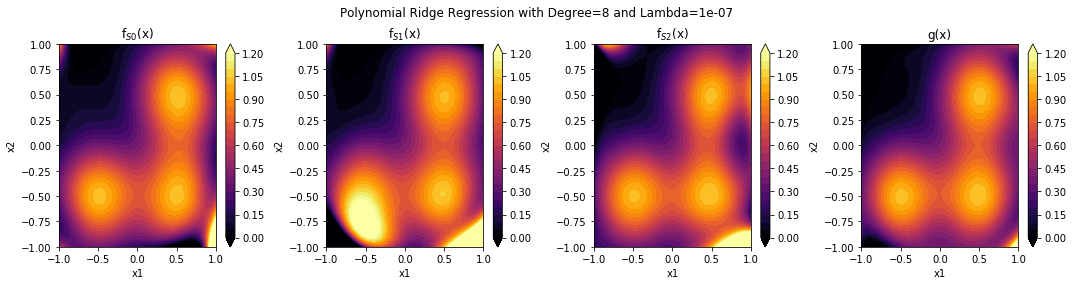

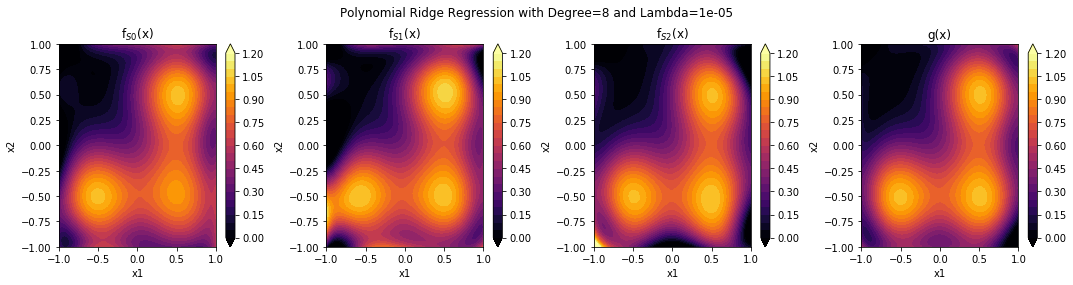

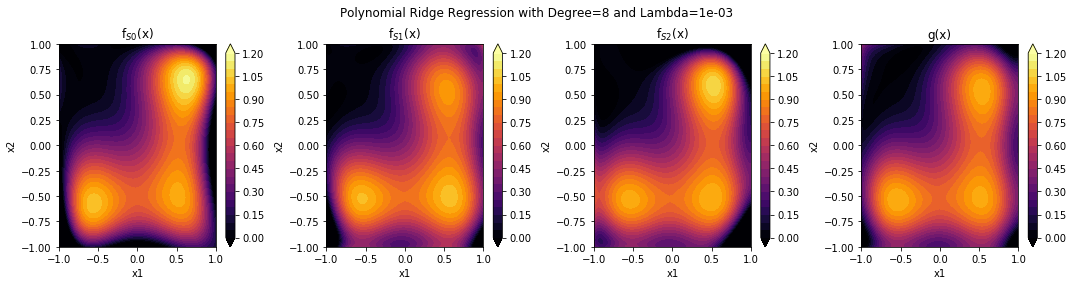

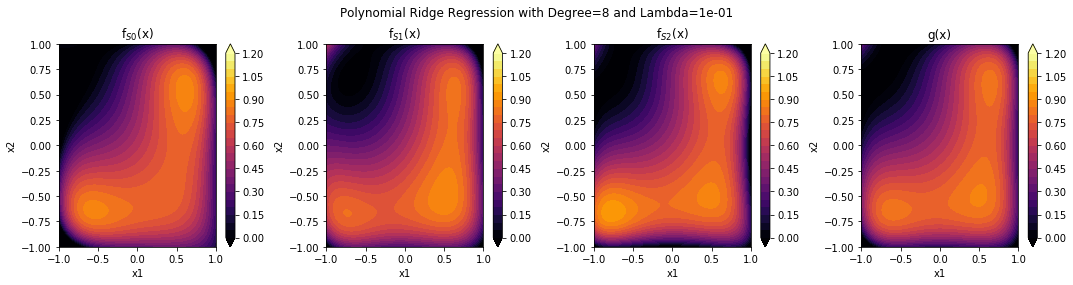

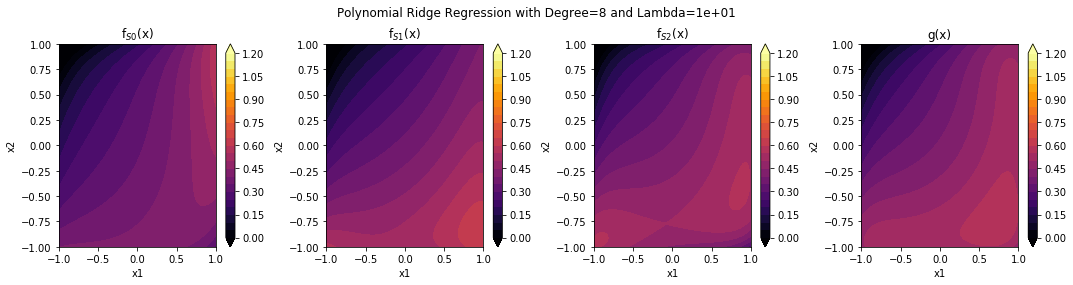

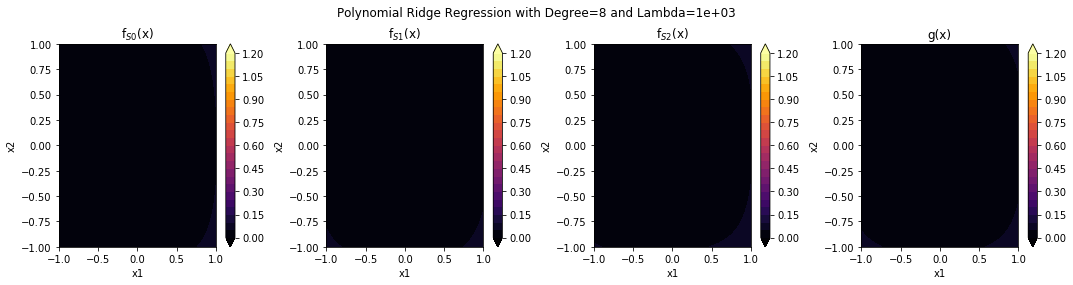

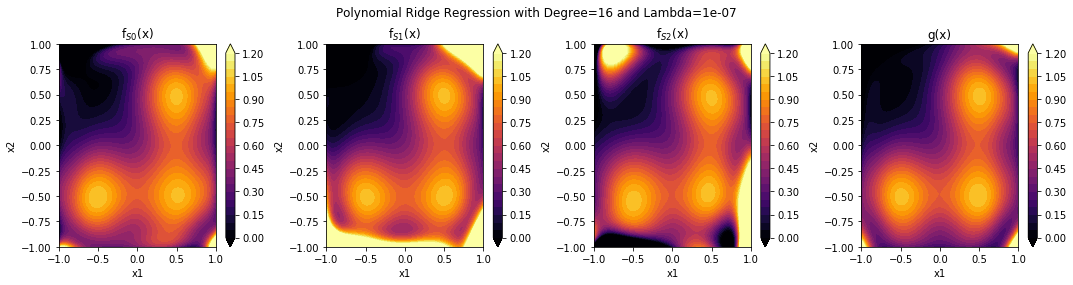

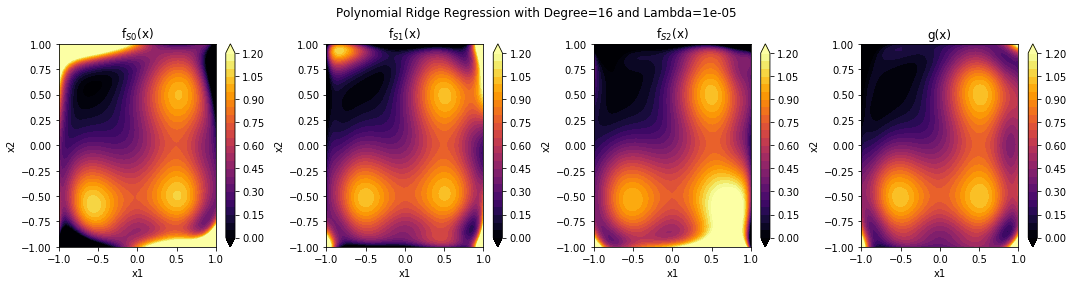

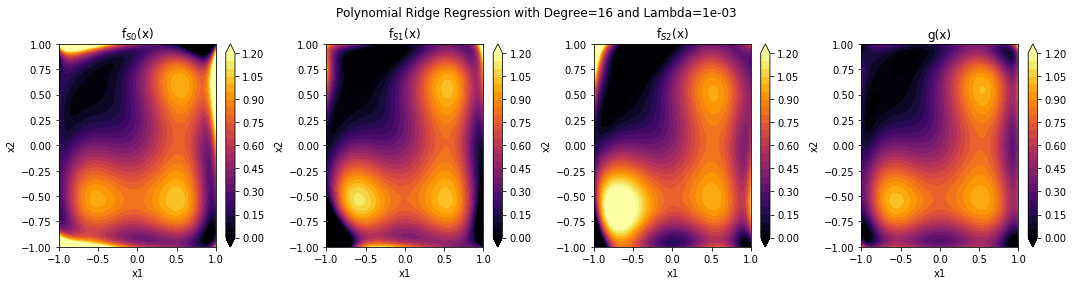

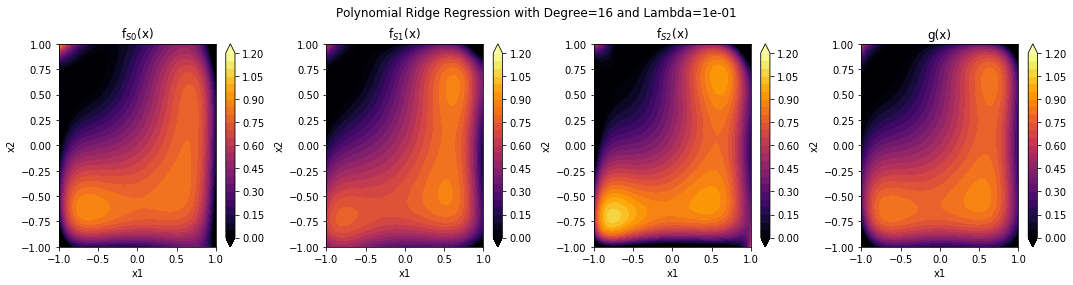

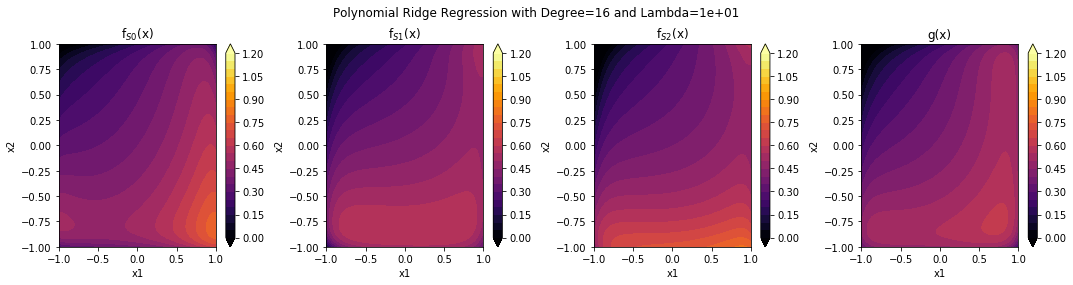

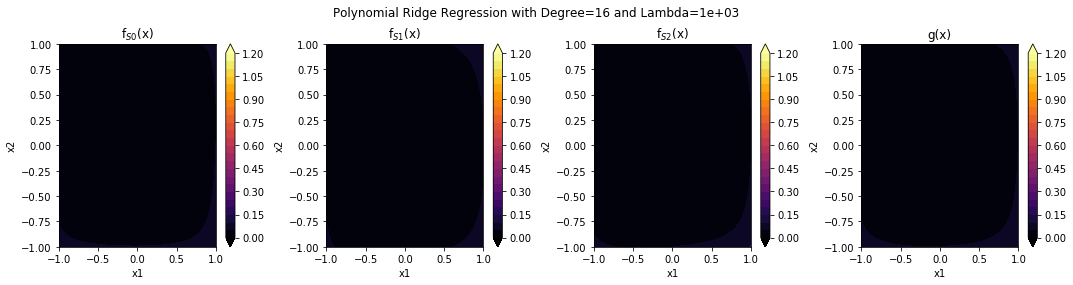

In [8]:
# Cell type : CodeWrite

def phi(X,degree):
    phi_mat = []
    for k in range(len(X)):
        phi_k = []
        for i in range(degree+1):
            for j in range(i+1):
                phi_k.append((X[k][0] ** (i-j) * (X[k][1] ** j)))
        phi_mat.append(phi_k)
    return np.asarray(phi_mat)

def polynomial_regression_ridge_pred(X_test, wt_vector, degree=1):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    phi_mat = phi(X_test, degree)
    return np.matmul(phi_mat, wt_vector)

     
def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    Xtotal = np.array([X.flatten(), Y.flatten()]).T
    plt.figure(figsize=(15, 4))
    plt.suptitle(title)
    for i in range(3):
        plt.subplot(1,4,i+1)
        Z = polynomial_regression_ridge_pred(Xtotal, wt_vector[i], degree).reshape(100,100)
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.contourf(X, Y, Z, levels=np.linspace(0., 1.2, 25), cmap='inferno', extend='both')
        plt.title('f$_{S%i}$(x)'%i)
        plt.tight_layout()
        plt.subplots_adjust(top=0.85)
        plt.colorbar()
    plt.subplot(1,4,4)
    W_avg=sum(wt_vector)/100
    Z = polynomial_regression_ridge_pred(Xtotal, W_avg, degree).reshape(100,100)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.contourf(X, Y, Z, levels=np.linspace(0., 1.2, 25), cmap='inferno', extend='both')
    plt.title('g(x)')
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.colorbar()

def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    phi_mat = phi(X_train, degree)
    return np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(phi_mat), phi_mat) + reg_param * np.eye(np.shape(phi_mat)[1])), np.transpose(phi_mat)),Y_train)

    
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """
     
    x1,x2 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
    X_all = np.array([x1.flatten(),x2.flatten()]).T
    a = np.array([0.5,0.5]); b = np.array([-0.5,-0.5]); c = np.array([0.5,-0.5])
    W = []
    
    for runs in range(100):
        rand = np.random.randint(10000, size = num_training_samples)
        X = X_all[rand, :]
        Y = np.exp(-4 * np.sum((X - a) ** 2, axis = 1)) + np.exp(-4 * np.sum((X - b) ** 2, axis = 1)) + np.exp(-4 * np.sum((X - c) ** 2, axis = 1))
        W.append(polynomial_regression_ridge_train(X, Y, degree, reg_param))
        
    visualise_polynomial_2d(W, degree, title='Polynomial Ridge Regression with Degree=%i'%degree + ' and Lambda=%.0e'%reg_param)

    f_star = np.zeros((10000,1)) 
    f_star[:,0] = np.exp(-4 * np.sum((X_all - a) ** 2, axis = 1)) + np.exp(-4 * np.sum((X_all - b) ** 2, axis = 1)) + np.exp(-4 * np.sum((X_all - c) ** 2, axis = 1))
    g_x = np.zeros((10000,1))
    f_s = np.zeros((10000,100))
    phi_mat = phi(X_all, degree)
    for j in range(100):
        f_s[:,j] = np.matmul(phi_mat, W[j])    
    g_x[:,0] = np.sum(f_s, axis = 1)/100
    bias = np.sum((g_x - f_star) ** 2)/10000
    variance = sum(sum((f_s - g_x) ** 2)/10000)/100
    MSE = bias + variance
    return bias, variance, MSE
    

for degree in [1, 2, 4, 8, 16]:
    for reg_param in [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]:
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        
#         print('================================')
#         print('Degree= '+str(degree)+' lambda= '+str(reg_param))
#         print('Bias = '+str(b))
#         print('Variance = '+str(v))
#         print('MSE = '+str(e))
        

In [9]:
# Cell type: convenience




** Cell type: TextWrite **
Give the biases and variances computed for the various algorithms with various degrees and lambdas and summarise your findings.

## <center>Bias Matrix</center> 
|&darr;Degree / Lambda&rarr;|1e-7| 1e-5| 1e-3| 1e-1| 1e1| 1e3| 
|-----------------|---------|---------|---------|----|----|----|
|<b>1</b>|0.0551775313778694|0.05513357795316725|0.05510746213857928|0.05509705007671791|0.06717966826483994|0.3075859672495337|
<b>2</b>|0.0345279125975960|0.03473733027867923|0.03465944586991579|0.03454588336866592|0.06239182731673103|0.3043004284412605|
<b>4</b>|0.0079131921650924|0.00824811209952588|0.00721837949787841|0.00897403885385253|0.05936581407492967|0.3027042345389957|
<b>8</b>|0.0059025185975979|0.00234805853365769|0.00359310477559547|0.00981867350487214|0.05551571497517720|0.3019388402389213|
<b>16</b>|0.0182202889406775|0.01262031533660752|0.00495908213744091|0.01166452043128398|0.05322650610750062|0.3014780611677228|

## <center>Variance Matrix</center> 
|&darr;Degree / Lambda&rarr;|1e-7| 1e-5| 1e-3| 1e-1| 1e1| 1e3| 
|-----------------|---------|---------|---------|----|----|----|
|<b>1</b>|0.0041645618518747|0.00345854703586931|0.0039673131054702|0.004093277166282355|0.001543063071804160|7.62051735520442e-6|
<b>2</b>|0.0053850790927357|0.00583802563855396|0.0058796853682387|0.004804948350451859|0.001674626068779786|7.87518415284514e-6|
<b>4</b>|0.0098688690283763|0.00929663197383657|0.0078287443798265|0.003635032945290348|0.002023774425798833|9.83439869747612e-6|
<b>8</b>|0.2181643332821676|0.04588374057969238|0.0179725732234922|0.006569390872213303|0.002371147464252768|1.56110969597846e-5|
<b>16</b>|0.3562553171579899|0.15095405558184224|0.0573827110037540|0.011975964834093179|0.002461907501212462|1.81850069562197e-5|

## <center>Observations</center> 

As a general trend, we observe that Bias decreases and Variance increases with increase in degree of polynomial. This is as expected, as higher degree polynomials are more susceptible to noise, implying higher variance. A decrease in bias with increasing degree of polynomial indicates that the data has been generated from a higher degree curve. 

With respect to Lambda, using lower lambda values gives better MSE (both Bias and Variance) when the degree of polynomial is low. However, as degree increases, using a slightly higher value of lambda gives better results, as higher coefficients for higher degree polynomials tend to overfit the data, thereby a regularization parameter becomes necessary. Using a very high lambda results in overregularization, thus giving poor results.

** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




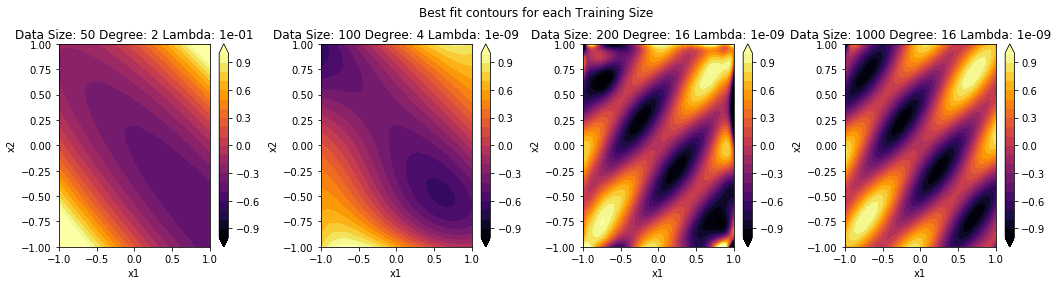

In [10]:
# Cell type : CodeWrite 

dataset4_1 = np.load('dataset4_1.npz')
X_train = dataset4_1['arr_0']
Y_train = dataset4_1['arr_1']
X_test = dataset4_1['arr_2']
Y_test = dataset4_1['arr_3'] 

def fit(degree, reg_param, num_training_samples):
    w = polynomial_regression_ridge_train(X_train[0:num_training_samples], Y_train[0:num_training_samples], degree, reg_param)
    y_hat_train = polynomial_regression_ridge_pred(X_train[0:num_training_samples], w, degree)
    train_error = (np.sum((Y_train[0:num_training_samples] - y_hat_train)**2)/num_training_samples)
    y_hat_test = polynomial_regression_ridge_pred(X_test, w, degree)
    test_error = (np.sum((Y_test - y_hat_test)**2)/len(Y_test))
    return w, train_error, test_error

def visualize_best(wt_vector, degree, title = ""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    Xtotal = np.array([X.flatten(), Y.flatten()]).T
    Z = polynomial_regression_ridge_pred(Xtotal, wt_vector, degree).reshape(100,100)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.contourf(X, Y, Z, levels=np.linspace(-1, 1, 21), cmap='inferno', extend='both')
    plt.title(title)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.colorbar()

degrees = [1, 2, 4, 8, 16]
reg_params = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]
degree_best=[]
lambda_best=[]
i = 1
plt.figure(figsize=(15, 4))
plt.suptitle("Best fit contours for each Training Size")
for train_size in [50, 100, 200, 1000]:
    train_errors = []
    test_errors = []
    weights = []
    for degree in [1, 2, 4, 8, 16]:
        error_degree_train = []
        error_degree_test = []
        weight_degree = []
        for reg_param in [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]:
            w, train_error, test_error = fit(degree, reg_param, train_size)
            error_degree_train.append(train_error)
            error_degree_test.append(test_error)
            weight_degree.append(w)
        train_errors.append(error_degree_train)
        test_errors.append(error_degree_test)
        weights.append(weight_degree)
#     print(train_errors)
#     print(test_errors)
#     print(int(np.where(test_errors == np.min(test_errors))[0]))
    degree_best.append(degrees[int(np.where(test_errors == np.min(test_errors))[0])])
    lambda_best.append(reg_params[int(np.where(test_errors == np.min(test_errors))[1])]) 
    plt.subplot(1,4,i)
    visualize_best(weights[int(np.where(test_errors == np.min(test_errors))[0])][int(np.where(test_errors == np.min(test_errors))[1])], degrees[int(np.where(test_errors == np.min(test_errors))[0])], "Data Size: %i"%train_size + " Degree: %i"%degree_best[i-1] + " Lambda: %.0e"%lambda_best[i-1])
    i += 1
plt.show()
# print(degree_best, lambda_best)


## <center>Best Degree and Regularization Parameters</center> 

|     Training Size  | Best Degree | Best Lambda | 
|--------------------|---------|---------|
| <b> 50 </b>| 2 | 0.1   |
| <b>100</b>|  4 | 1e-9  | 
| <b>200</b>|  16 | 1e-9  |
| <b>1000</b>|  16 | 1e-9  |


## <center> Train and Test Errors for Training Size : 50</center> 

### <center> Train Errors</center>

|&darr;Degree / Lambda&rarr;|1e-9|1e-7|1e-5|1e-3|1e-1|1e1| 
|-----------------|---------|---------|---------|----|----|----|
|<b>1</b>|0.25038312406572716| 0.2503831240657272| 0.25038312406574026| 0.2503831241962755| 0.2503844155180829| 0.25589782969635694|
|<b>2</b>|0.25038312406572716| 0.2503831240657272| 0.25038312406574026| 0.2503831241962755| 0.2503844155180829| 0.25589782969635694|
|<b>4</b>|0.10201831452660748| 0.1020183145266193| 0.10201831464463729| 0.1020194560543771| 0.10410664921246368| 0.18063792530763295|
|<b>8</b>|0.00013273273940815| 0.000199157117815095| 0.010765781159161684| 0.04172134455599569| 0.08199099254870251| 0.1631997018256799|
|<b>16</b>|1.95657063229226e-8| 9.367001113417012e-6| 0.0013176931542080033| 0.031113092536491815| 0.07002070549491678| 0.15001286027072638|

### <center> Test Errors</center>

|&darr;Degree / Lambda&rarr;|1e-9|1e-7|1e-5|1e-3|1e-1|1e1| 
|-----------------|---------|---------|---------|----|----|----|
|<b>1</b>| 0.3012668176334998| 0.30126681720565984| 0.301266774421703| 0.30126249638185765| 0.300838224249188| 0.2783506938903703|
|<b>2</b> |0.15789998862477167| 0.15789998726922783| 0.15789985171700216| 0.15788631804663877| <b>0.15673525917060369</b>| 0.20822364120741071|
|<b>4</b> |0.15733396608389005| 0.157333956015991| 0.15733295030576855| 0.15724278102171774| 0.16182638818918796| 0.19656859546515698|
|<b>8</b>|237.69005762457633| 172.50186181098655| 18.5942539318527| 0.990250752865306| 0.16515576169864007| 0.1939185875290034|
|<b>16</b>|250.5224444512839| 232.02483398763775| 66.69768436804462| 2.3373083260654126| 0.20396145737466262| 0.19605732165075784|

## <center> Train and Test Errors for Training Size : 100</center> 

### <center> Train Errors</center>

|&darr;Degree / Lambda&rarr;|1e-9|1e-7|1e-5|1e-3|1e-1|1e1| 
|-----------------|---------|---------|---------|----|----|----|
|<b>1</b>|0.25809101333931356| 0.2580910133393136| 0.2580910133393146|0.25809101334983686| 0.2580911180012409| 0.25873987508331553|
|<b>2</b>|0.13095062750764616| 0.1309506275076462| 0.13095062750780453| 0.13095062909102842| 0.13096608770879403| 0.16496776073260552|
|<b>4</b>|0.11302663784179166|0.11302663784179275| 0.11302663785305084| 0.11302674963672635| 0.11365141158303724| 0.1523734887365071|
|<b>8</b>|0.041587926415535| 0.04158793751658098| 0.04168003942664227| 0.058008466397884983|0.09290160568698451| 0.14488569592362943|
|<b>16</b>|7.73451415477164e-06| 0.00048396690532602834| 0.007544023924301255| 0.04172918471042623| 0.08369694254931254| 0.13954383780205437|

### <center> Test Errors</center>

|&darr;Degree / Lambda&rarr;|1e-9|1e-7|1e-5|1e-3|1e-1|1e1| 
|-----------------|---------|---------|---------|----|----|----|
|<b>1</b>| 0.273148637804952| 0.2731486377397294| 0.2731486312174763| 0.27314797902036564| 0.27308304030498215| 0.26862153976765146|
|<b>2</b> |0.15320993118280649|0.15320993087074367| 0.153209899664675| 0.15320678118763398| 0.15291576223583916| 0.17570947703823855|
|<b>4</b> |<b>0.1427757518683784</b>| 0.14277575501902778| 0.14277607009019863|0.14280763851944253| 0.14602043222215302|0.16898019238628958|
|<b>8</b>|0.712916350689679| 0.7113196275161201| 0.5807591355963249| 0.20363826301800295| 0.1626275772179942| 0.1711684367937082|
|<b>16</b>|54.08008762069805| 11.770420198975373| 23.416588846476255| 0.41784850840064125| 0.18835914466913117| 0.1741599689085641|


## <center> Train and Test Errors for Training Size : 200</center> 

### <center> Train Errors</center>

|&darr;Degree / Lambda&rarr;|1e-9|1e-7|1e-5|1e-3|1e-1|1e1| 
|-----------------|---------|---------|---------|----|----|----|
|<b>1</b>|0.24653507447805262|0.24653507447805256|0.2465350744780527|0.2465350744794022|0.24653508793957898| 0.24664115434052242|
|<b>2</b>|0.13366532560035835|0.13366532560035835|0.13366532560039207| 0.1336653259375662| 0.13366866006096548| 0.14754903759873952|
|<b>4</b>|0.11333815608726723|0.11333815608726752| 0.11333815609035065| 0.1133381868560195| 0.11358989298188124| 0.14444440429596622|
|<b>8</b>|0.06173732230563937| 0.061737322385291| 0.06173810090970036| 0.06394973229163098|0.0956872306970789| 0.14119279224291703|
|<b>16</b>|2.8816945967588173e-05| 0.0010854317170360928| 0.011325564336205202|  0.04446326750320126| 0.0834995667179934| 0.1337625989052683|

### <center> Test Errors</center>

|&darr;Degree / Lambda&rarr;|1e-9|1e-7|1e-5|1e-3|1e-1|1e1| 
|-----------------|---------|---------|---------|----|----|----|
|<b>1</b>|0.2676630503284213| 0.26766305031122006| 0.26766304859110607| 0.26766287658322135| 0.267645710961082| 0.2662254689671442|
|<b>2</b>|0.1457806507687193| 0.14578065073911128| 0.14578064777834812| 0.145780352076277| 0.14575448305638755| 0.15868222888420486|
|<b>4</b>|0.13117096921340618| 0.1311709685337519| 0.13117090057246028| 0.13116414573830334| 0.13083053450167625| 0.1570851154656927|
|<b>8</b>|0.13736299466611018| 0.13735917852814458| 0.1369820493320047| 0.11818259300507467| 0.11396536050910236| 0.15645117748199017|
|<b>16</b>|<b>0.03714985423040126</b>| 0.08371021414173462| 0.17080665781451318| 0.08690369897735105| 0.11121403432996503| 0.15224401261127452|

## <center> Train and Test Errors for Training Size : 1000</center> 

### <center> Train Errors</center>

|&darr;Degree / Lambda&rarr;|1e-9|1e-7|1e-5|1e-3|1e-1|1e1| 
|-----------------|---------|---------|---------|----|----|----|
|<b>1</b>|0.240728218518123| 0.240728218518123| 0.240728218518123| 0.24072821851812826| 0.24072821857035245| 0.24072871841517668|
|<b>2</b>|0.1388241025424672| 0.1388241025424672| 0.13882410254246827| 0.1388241025534238| 0.1388242118754503| 0.13971802344395548 |
|<b>4</b>|0.12501724217128068| 0.12501724217128068| 0.12501724217136287| 0.12501724299300632| 0.1250251158363281| 0.13417202903703976|
|<b>8</b>|0.07674285354368449| 0.07674285354504168| 0.07674286707498436| 0.07684621641426166| 0.09483803187328169| 0.12843822791852466|
|<b>16</b>|2.5486149226021872e-05| 0.0004451268325050556| 0.006533490639315773|0.03841533988818111| 0.084992576295162| 0.12168732408409079|

### <center> Test Errors</center>

|&darr;Degree / Lambda&rarr;|1e-9|1e-7|1e-5|1e-3|1e-1|1e1| 
|-----------------|---------|---------|---------|----|----|----|
|<b>1</b>|0.26253465030676987| 0.2625346503067176| 0.2625346503014934| 0.26253464977907653| 0.26253459763327336|0.26253030415658635 |
|<b>2</b>|0.14242931863755282| 0.14242931865008004| 0.14242931990280278| 0.14242944518520467| 0.14244207449857785| 0.144518851141229 |
|<b>4</b>|0.12707962836551748| 0.1270796285222252| 0.12707964419304255| 0.1270812117133754| 0.12724209494603952| 0.14093658935220113| 
|<b>8</b>|0.08481273587160475| 0.08481261182165982| 0.08480025143226622| 0.08391323545989254| 0.09782269201133853| 0.13498892442359717|
|<b>16</b>|<b>0.001197736087035873</b>| 0.0014900653265283715| 0.010957186956738994| 0.04965812595831626| 0.09073740480490448| 0.12782089604965322|

## <center>Observations</center> 

Training error decreases with the degree of polynomial for all training sizes as the curve fits the training data better. For a training size of 50, degree 2 gives the best test accuracy as higher degree fits over these 50 points, being highly susceptible to noise, overfit the training data, thus losing generalization capability on test data. i.e, bias decreases while variance increases with increasing degree of polynomial. As the training size increases, higher degree polynomials become less susceptible to noise, thus having a better generalization capability, i.e., better test accuracies. To look at it in another way, test error can be seen as the sum of bias and variance. As inferred from question-3, bias generally decreases with increasing degree of polynomial while variance increases. The best degree for a particular training size can be seen as the closest point to the minima of test error(bias + variance). Regularization wasn't a necessity for higher degree polynomials as inferred from the low values of lambda, indicating that the given data was generated from a higher degree curve. 
